In [ ]:
# ARIMA time series forcasting
# ARIM = Auto Regressive Integrated Moving Average

In [ ]:
!pip install matplotlib

In [ ]:
import yfinance as yf

In [ ]:
df=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-06-22,64113.863281,64475.468750,63929.757812,64252.578125,64252.578125,9858198793
2024-06-23,64248.964844,64491.703125,63180.796875,63180.796875,63180.796875,11170471802
2024-06-24,63173.351562,63292.527344,58601.699219,60277.414062,60277.414062,43152133651


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

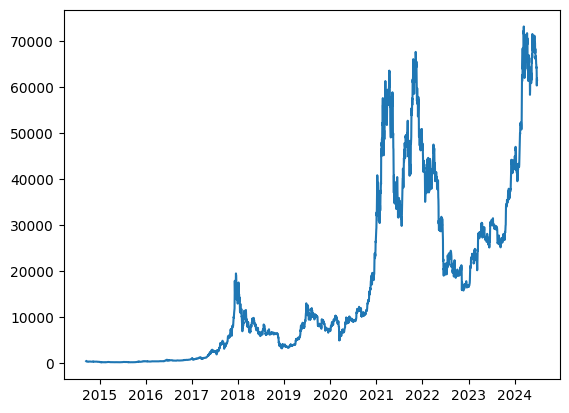

In [ ]:
plt.plot(df.index, df['Adj Close'])

In [ ]:
#split data into train and training set
to_row=int(len(df)*0.9)

training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])

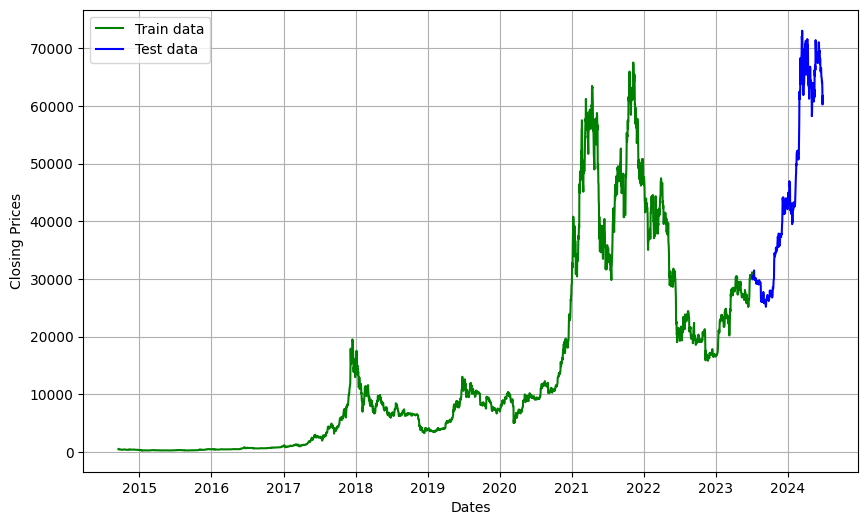

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test data')
plt.legend()

In [ ]:
model_predictions=[]
n_test_obser=len(testing_data)

In [ ]:
for i in range(n_test_obser):
    model=ARIMA(training_data, order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)
    # break

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3570
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -29156.338
Date:                Wed, 26 Jun 2024   AIC                          58322.676
Time:                        08:31:46   BIC                          58353.577
Sample:                             0   HQIC                         58333.693
                               - 3570                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0553      0.008     -6.655      0.000      -0.072      -0.039
ar.L2          0.0109      0.009      1.233      0.218      -0.006       0.028
ar.L3          0.0322      0.009      3.402      0.0

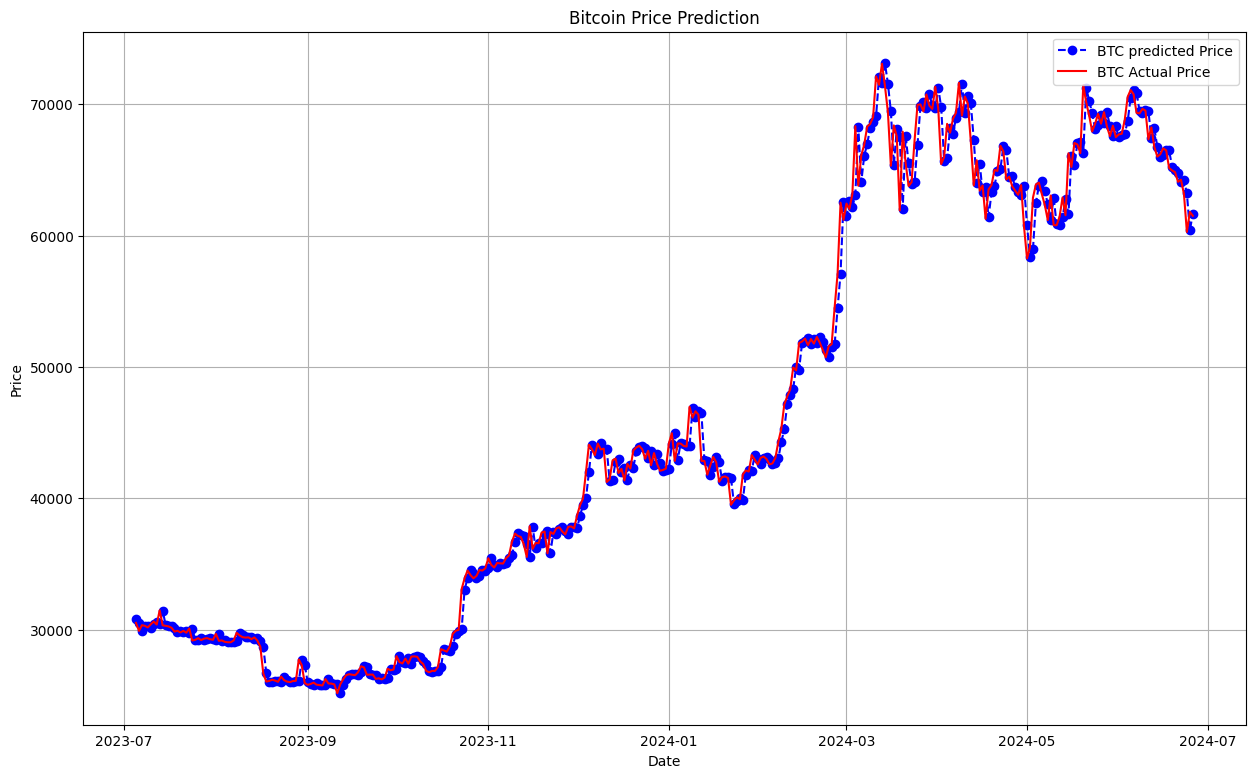

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range=df[to_row:].index

plt.plot(data_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='BTC predicted Price')
plt.plot(data_range,testing_data,color='red',label='BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#report performance
mape=np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape)) #Mean Absolute Percentage Error

NameError: name 'model_predictions' is not defined

In [ ]:
!pip install gradio statsmodels numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s e

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
import requests
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Function to fetch the latest Bitcoin price
def fetch_latest_price():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=1"
    response = requests.get(url)
    data = response.json()
    prices = data['prices']
    latest_price = prices[-1][1]
    timestamp = prices[-1][0]
    date_time = datetime.fromtimestamp(timestamp / 1000)
    return date_time, latest_price

# Function to train the model and make a prediction
def train_and_predict(csv_file):
    df = pd.read_csv(csv_file)
    to_row = int(len(df) * 0.9)
    training_data = list(df[0:to_row]['Adj Close'])
    testing_data = list(df[to_row:]['Adj Close'])

    latest_date, latest_price = fetch_latest_price()
    training_data.append(latest_price)

    model_predictions = []
    n_test_obser = len(testing_data)

    for i in range(n_test_obser):
        model = ARIMA(training_data, order=(4, 1, 0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        model_predictions.append(yhat)
        actual_test_value = testing_data[i]
        training_data.append(actual_test_value)

    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    next_forecast = model_fit.forecast()[0]

    mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))

    # Plotting
    plt.figure(figsize=(15, 9))
    plt.grid(True)
    data_range = df[to_row:].index

    plt.plot(data_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='BTC Predicted Price')
    plt.plot(data_range, testing_data, color='red', label='BTC Actual Price')

    plt.title('Bitcoin Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.savefig('prediction_plot.png')
    plt.close()

    return f"Next predicted price: {next_forecast:.2f} USD", f"MAPE: {mape:.2%}", 'prediction_plot.png'

# Define Gradio interface
iface = gr.Interface(
    fn=train_and_predict,
    inputs="file",
    outputs=["text", "text", "image"],
    title="Bitcoin Price Prediction",
    description="Upload a CSV file with historical Bitcoin prices to predict the next price."
)

# Launch Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://da243f99850a131b8d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
